In [1]:
def get_obj_values(run_gen_text_content: str):
    output_list = []
    for solution_text in run_gen_text_content.split("--------------")[:-1]:
        run_gen_solution_text_content = solution_text
        output_list.append([float(item[item.find(': ')+2:]) for item in run_gen_solution_text_content[run_gen_solution_text_content.find(']')+1:].split('\n')[1:-1]])
    return output_list

In [2]:
import os

def load_runs_and_gens_as_dict(directory="."):
    data = {}
    run_index = 0

    while True:
        run_key = f"run_{run_index}"
        gen_index = 0
        run_data = []

        while True:
            filename = f"{run_key}_gen_{gen_index}.txt"
            filepath = os.path.join(directory, filename)

            if os.path.isfile(filepath):
                with open(filepath, 'r', encoding='utf-8') as f:
                    run_data.append(get_obj_values(f.read()))
                gen_index += 1
            else:
                break  # No more gens for this run

        if run_data:
            data[run_key] = run_data
            run_index += 1
        else:
            break  # No more runs

    return data


In [3]:
run_gen_dict = load_runs_and_gens_as_dict()
run_gen_dict

{'run_0': [[[0.48, 0.71, 0.46],
   [0.52, 0.67, 0.51],
   [0.62, 0.69, 0.33],
   [0.59, 0.69, 0.34],
   [0.53, 0.69, 0.42],
   [0.53, 0.69, 0.42]],
  [[0.48, 0.71, 0.46],
   [0.52, 0.67, 0.51],
   [0.62, 0.69, 0.33],
   [0.59, 0.69, 0.34],
   [0.53, 0.69, 0.35],
   [0.52, 0.7, 0.43],
   [0.49, 0.71, 0.39],
   [0.67, 0.68, 0.38],
   [0.51, 0.7, 0.47]],
  [[0.51, 0.71, 0.38],
   [0.6, 0.66, 0.53],
   [0.58, 0.68, 0.3],
   [0.61, 0.67, 0.45],
   [0.48, 0.71, 0.46],
   [0.53, 0.69, 0.35],
   [0.53, 0.71, 0.33],
   [0.51, 0.7, 0.47],
   [0.52, 0.67, 0.51],
   [0.52, 0.7, 0.43]]],
 'run_1': [[[0.66, 0.74, 0.21],
   [0.63, 0.77, 0.18],
   [0.6, 0.75, 0.23],
   [0.65, 0.78, 0.17],
   [0.58, 0.78, 0.18]],
  [[0.63, 0.77, 0.18],
   [0.65, 0.78, 0.17],
   [0.58, 0.78, 0.18],
   [0.56, 0.73, 0.21],
   [0.57, 0.75, 0.19],
   [0.65, 0.74, 0.19],
   [0.66, 0.76, 0.17]],
  [[0.66, 0.76, 0.17], [0.6, 0.77, 0.15], [0.55, 0.73, 0.18]]],
 'run_2': [[[0.59, 0.83, 0.12]],
  [[0.59, 0.83, 0.12], [0.61, 0.82,

In [4]:
def dict_to_data_for_visualization(run_gen_values_dict: dict):
    all = {}
    for key,run in run_gen_values_dict.items():
        all[key] = {}
        for generation in run:
            all[key][run.index(generation)] = {}
            min_obj1 = min([solution[0] for solution in generation])
            min_obj2 = min([solution[1] for solution in generation])
            min_obj3 = min([solution[2] for solution in generation])
            avg_obj1 = sum([solution[0] for solution in generation]) / len(generation)
            avg_obj2 = sum([solution[1] for solution in generation]) / len(generation)
            avg_obj3 = sum([solution[2] for solution in generation]) / len(generation)

            all[key][run.index(generation)]["min_obj1"] = min_obj1
            all[key][run.index(generation)]["min_obj2"] = min_obj2
            all[key][run.index(generation)]["min_obj3"] = min_obj3

            all[key][run.index(generation)]["avg_obj1"] = avg_obj1
            all[key][run.index(generation)]["avg_obj2"] = avg_obj2
            all[key][run.index(generation)]["avg_obj3"] = avg_obj3

            print(f"For the run index {key} and generation index {run.index(generation)}:")
            print(f"MIN of objective index 0: {min_obj1}")
            print(f"MIN of objective index 1: {min_obj2}")
            print(f"MIN of objective index 2: {min_obj3}")
            print(f"AVG of objective index 0: {avg_obj1}")
            print(f"AVG of objective index 1: {avg_obj2}")
            print(f"AVG of objective index 2: {avg_obj3}")
            print("--------------")
    return all


visualization_data = dict_to_data_for_visualization(run_gen_dict)
visualization_data

For the run index run_0 and generation index 0:
MIN of objective index 0: 0.48
MIN of objective index 1: 0.67
MIN of objective index 2: 0.33
AVG of objective index 0: 0.545
AVG of objective index 1: 0.69
AVG of objective index 2: 0.41333333333333333
--------------
For the run index run_0 and generation index 1:
MIN of objective index 0: 0.48
MIN of objective index 1: 0.67
MIN of objective index 2: 0.33
AVG of objective index 0: 0.5477777777777777
AVG of objective index 1: 0.6933333333333334
AVG of objective index 2: 0.4066666666666667
--------------
For the run index run_0 and generation index 2:
MIN of objective index 0: 0.48
MIN of objective index 1: 0.66
MIN of objective index 2: 0.3
AVG of objective index 0: 0.5389999999999999
AVG of objective index 1: 0.6900000000000001
AVG of objective index 2: 0.421
--------------
For the run index run_1 and generation index 0:
MIN of objective index 0: 0.58
MIN of objective index 1: 0.74
MIN of objective index 2: 0.17
AVG of objective index 0: 

{'run_0': {0: {'min_obj1': 0.48,
   'min_obj2': 0.67,
   'min_obj3': 0.33,
   'avg_obj1': 0.545,
   'avg_obj2': 0.69,
   'avg_obj3': 0.41333333333333333},
  1: {'min_obj1': 0.48,
   'min_obj2': 0.67,
   'min_obj3': 0.33,
   'avg_obj1': 0.5477777777777777,
   'avg_obj2': 0.6933333333333334,
   'avg_obj3': 0.4066666666666667},
  2: {'min_obj1': 0.48,
   'min_obj2': 0.66,
   'min_obj3': 0.3,
   'avg_obj1': 0.5389999999999999,
   'avg_obj2': 0.6900000000000001,
   'avg_obj3': 0.421}},
 'run_1': {0: {'min_obj1': 0.58,
   'min_obj2': 0.74,
   'min_obj3': 0.17,
   'avg_obj1': 0.624,
   'avg_obj2': 0.764,
   'avg_obj3': 0.194},
  1: {'min_obj1': 0.56,
   'min_obj2': 0.73,
   'min_obj3': 0.17,
   'avg_obj1': 0.6142857142857142,
   'avg_obj2': 0.7585714285714287,
   'avg_obj3': 0.1842857142857143},
  2: {'min_obj1': 0.55,
   'min_obj2': 0.73,
   'min_obj3': 0.15,
   'avg_obj1': 0.6033333333333334,
   'avg_obj2': 0.7533333333333333,
   'avg_obj3': 0.16666666666666666}},
 'run_2': {0: {'min_obj1':

{0: {'min_obj1': 0.48, 'min_obj2': 0.67, 'min_obj3': 0.33, 'avg_obj1': 0.545, 'avg_obj2': 0.69, 'avg_obj3': 0.41333333333333333}, 1: {'min_obj1': 0.48, 'min_obj2': 0.67, 'min_obj3': 0.33, 'avg_obj1': 0.5477777777777777, 'avg_obj2': 0.6933333333333334, 'avg_obj3': 0.4066666666666667}, 2: {'min_obj1': 0.48, 'min_obj2': 0.66, 'min_obj3': 0.3, 'avg_obj1': 0.5389999999999999, 'avg_obj2': 0.6900000000000001, 'avg_obj3': 0.421}}


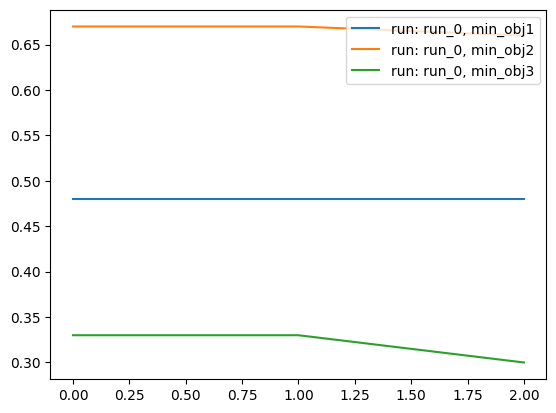

{0: {'min_obj1': 0.58, 'min_obj2': 0.74, 'min_obj3': 0.17, 'avg_obj1': 0.624, 'avg_obj2': 0.764, 'avg_obj3': 0.194}, 1: {'min_obj1': 0.56, 'min_obj2': 0.73, 'min_obj3': 0.17, 'avg_obj1': 0.6142857142857142, 'avg_obj2': 0.7585714285714287, 'avg_obj3': 0.1842857142857143}, 2: {'min_obj1': 0.55, 'min_obj2': 0.73, 'min_obj3': 0.15, 'avg_obj1': 0.6033333333333334, 'avg_obj2': 0.7533333333333333, 'avg_obj3': 0.16666666666666666}}


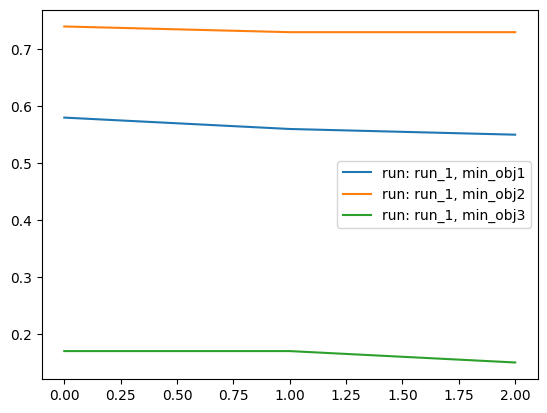

{0: {'min_obj1': 0.59, 'min_obj2': 0.83, 'min_obj3': 0.12, 'avg_obj1': 0.59, 'avg_obj2': 0.83, 'avg_obj3': 0.12}, 1: {'min_obj1': 0.59, 'min_obj2': 0.82, 'min_obj3': 0.12, 'avg_obj1': 0.5966666666666667, 'avg_obj2': 0.8233333333333333, 'avg_obj3': 0.15}, 2: {'min_obj1': 0.57, 'min_obj2': 0.82, 'min_obj3': 0.11, 'avg_obj1': 0.588, 'avg_obj2': 0.828, 'avg_obj3': 0.126}}


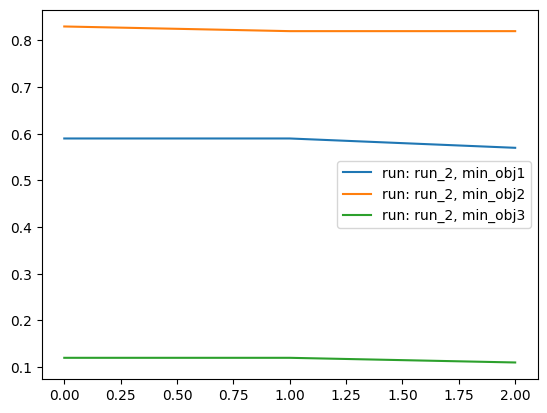

{0: {'min_obj1': 0.64, 'min_obj2': 0.86, 'min_obj3': 0.12, 'avg_obj1': 0.6466666666666666, 'avg_obj2': 0.8633333333333333, 'avg_obj3': 0.13999999999999999}, 1: {'min_obj1': 0.6, 'min_obj2': 0.85, 'min_obj3': 0.1, 'avg_obj1': 0.635, 'avg_obj2': 0.855, 'avg_obj3': 0.11}, 2: {'min_obj1': 0.57, 'min_obj2': 0.85, 'min_obj3': 0.1, 'avg_obj1': 0.6033333333333334, 'avg_obj2': 0.8533333333333334, 'avg_obj3': 0.11}}


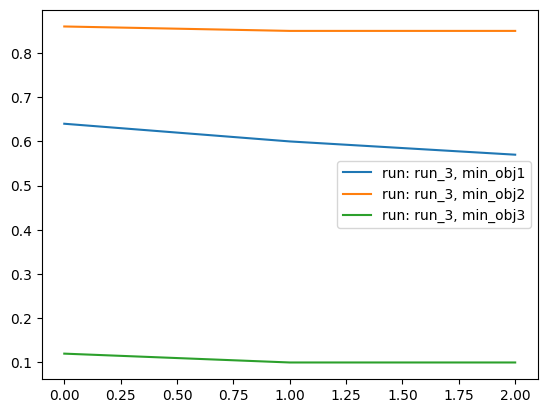

In [5]:
import matplotlib.pyplot as plt

def visualize(data_for_visualization: dict):
    for run, run_values in data_for_visualization.items():
        gens = []
        min_obj1_values = []
        min_obj2_values = []
        min_obj3_values = []
        print(run_values)
        for gen, gen_values in run_values.items():
            gens.append(gen)
            min_obj1 = gen_values["min_obj1"]
            min_obj2 = gen_values["min_obj2"]
            min_obj3 = gen_values["min_obj3"]

            min_obj1_values.append(min_obj1)
            min_obj2_values.append(min_obj2)
            min_obj3_values.append(min_obj3)

        plt.plot(gens, min_obj1_values, label=f"run: {run}, min_obj1")
        plt.plot(gens, min_obj2_values, label=f"run: {run}, min_obj2")
        plt.plot(gens, min_obj3_values, label=f"run: {run}, min_obj3")
        plt.legend()
        plt.show()

visualize(visualization_data)

{0: {'min_obj1': 0.48, 'min_obj2': 0.67, 'min_obj3': 0.33, 'avg_obj1': 0.545, 'avg_obj2': 0.69, 'avg_obj3': 0.41333333333333333}, 1: {'min_obj1': 0.48, 'min_obj2': 0.67, 'min_obj3': 0.33, 'avg_obj1': 0.5477777777777777, 'avg_obj2': 0.6933333333333334, 'avg_obj3': 0.4066666666666667}, 2: {'min_obj1': 0.48, 'min_obj2': 0.66, 'min_obj3': 0.3, 'avg_obj1': 0.5389999999999999, 'avg_obj2': 0.6900000000000001, 'avg_obj3': 0.421}}


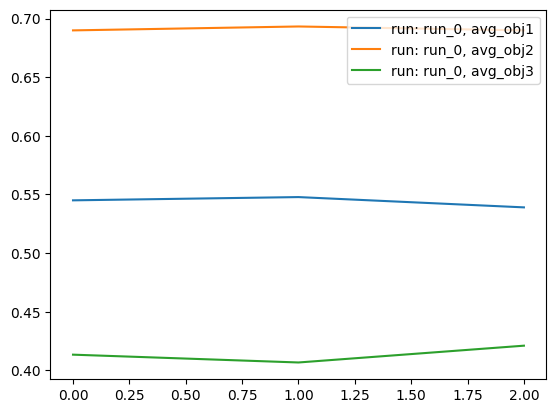

{0: {'min_obj1': 0.58, 'min_obj2': 0.74, 'min_obj3': 0.17, 'avg_obj1': 0.624, 'avg_obj2': 0.764, 'avg_obj3': 0.194}, 1: {'min_obj1': 0.56, 'min_obj2': 0.73, 'min_obj3': 0.17, 'avg_obj1': 0.6142857142857142, 'avg_obj2': 0.7585714285714287, 'avg_obj3': 0.1842857142857143}, 2: {'min_obj1': 0.55, 'min_obj2': 0.73, 'min_obj3': 0.15, 'avg_obj1': 0.6033333333333334, 'avg_obj2': 0.7533333333333333, 'avg_obj3': 0.16666666666666666}}


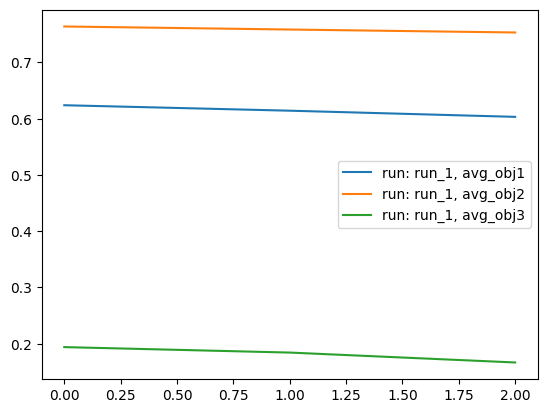

{0: {'min_obj1': 0.59, 'min_obj2': 0.83, 'min_obj3': 0.12, 'avg_obj1': 0.59, 'avg_obj2': 0.83, 'avg_obj3': 0.12}, 1: {'min_obj1': 0.59, 'min_obj2': 0.82, 'min_obj3': 0.12, 'avg_obj1': 0.5966666666666667, 'avg_obj2': 0.8233333333333333, 'avg_obj3': 0.15}, 2: {'min_obj1': 0.57, 'min_obj2': 0.82, 'min_obj3': 0.11, 'avg_obj1': 0.588, 'avg_obj2': 0.828, 'avg_obj3': 0.126}}


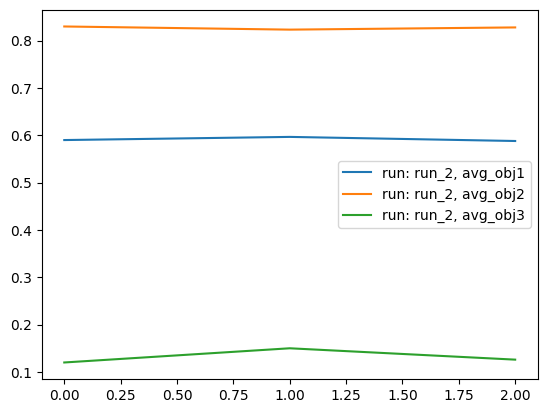

{0: {'min_obj1': 0.64, 'min_obj2': 0.86, 'min_obj3': 0.12, 'avg_obj1': 0.6466666666666666, 'avg_obj2': 0.8633333333333333, 'avg_obj3': 0.13999999999999999}, 1: {'min_obj1': 0.6, 'min_obj2': 0.85, 'min_obj3': 0.1, 'avg_obj1': 0.635, 'avg_obj2': 0.855, 'avg_obj3': 0.11}, 2: {'min_obj1': 0.57, 'min_obj2': 0.85, 'min_obj3': 0.1, 'avg_obj1': 0.6033333333333334, 'avg_obj2': 0.8533333333333334, 'avg_obj3': 0.11}}


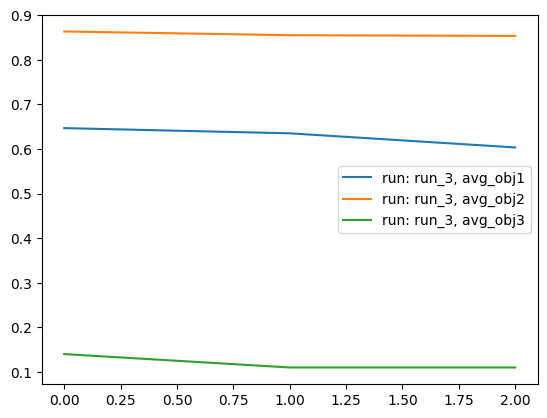

In [6]:
import matplotlib.pyplot as plt

def visualize(data_for_visualization: dict):
    for run, run_values in data_for_visualization.items():
        gens = []
        avg_obj1_values = []
        avg_obj2_values = []
        avg_obj3_values = []
        print(run_values)
        for gen, gen_values in run_values.items():
            gens.append(gen)
            avg_obj1 = gen_values["avg_obj1"]
            avg_obj2 = gen_values["avg_obj2"]
            avg_obj3 = gen_values["avg_obj3"]

            avg_obj1_values.append(avg_obj1)
            avg_obj2_values.append(avg_obj2)
            avg_obj3_values.append(avg_obj3)

        plt.plot(gens, avg_obj1_values, label=f"run: {run}, avg_obj1")
        plt.plot(gens, avg_obj2_values, label=f"run: {run}, avg_obj2")
        plt.plot(gens, avg_obj3_values, label=f"run: {run}, avg_obj3")
        plt.legend()
        plt.show()

visualize(visualization_data)